## TP fashion
## Partie 1 : analyse des données

In [10]:
from keras.datasets import fashion_mnist
# load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
all_labels = np.concatenate([trainy, testy])
trainX.shape

(60000, 28, 28)

In [3]:
trainy.shape

(60000,)

## Compte du nombre d'image par classe

In [7]:
num_classes = len(np.unique(trainy))

# Compter le nombre d'images par classe
class_counts = {label: np.sum(all_labels == label) for label in range(num_classes)}

# Résultats
print(f"Nombre de classes : {num_classes}")
print("Nombre d'images par classe :")
for label, count in class_counts.items():
    print(f"Classe {label}: {count} images")

Nombre de classes : 10
Nombre d'images par classe :
Classe 0: 7000 images
Classe 1: 7000 images
Classe 2: 7000 images
Classe 3: 7000 images
Classe 4: 7000 images
Classe 5: 7000 images
Classe 6: 7000 images
Classe 7: 7000 images
Classe 8: 7000 images
Classe 9: 7000 images


In [12]:
# Les images restent sous forme (28, 28)
images_2D = trainX
print("Forme des images (2D) :", images_2D.shape)  # (60000, 28, 28)

# Transformation en vecteurs 1D (28x28 = 784)
images_1D = trainX.reshape(trainX.shape[0], -1)
print("Forme des images (1D) :", images_1D.shape)  # (60000, 784)


Forme des images (2D) : (60000, 28, 28)
Forme des images (1D) : (60000, 784)


In [13]:
# Normalisation entre 0 et 1
images_2D = images_2D / 255.0
images_1D = images_1D / 255.0


In [14]:

# Création d'un DataFrame pour les images aplaties
df_images = pd.DataFrame(images_1D)
df_images['label'] = trainy

print(df_images.head())  # Affiche un aperçu des premières lignes


     0    1    2    3    4         5    6    7         8         9  ...  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   
1  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.000000  0.000000  ...   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.086275  ...   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.129412  0.376471  ...   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   

        775       776       777  778  779  780  781  782  783  label  
0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      9  
1  0.447059  0.509804  0.298039  0.0  0.0  0.0  0.0  0.0  0.0      0  
2  0.000000  0.003922  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      0  
3  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      3  
4  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      0  

[5 rows x 785 columns]


In [ ]:
# Dictionnaire des noms des classes
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}


## Représentation des 10 premières images avec leur classe 

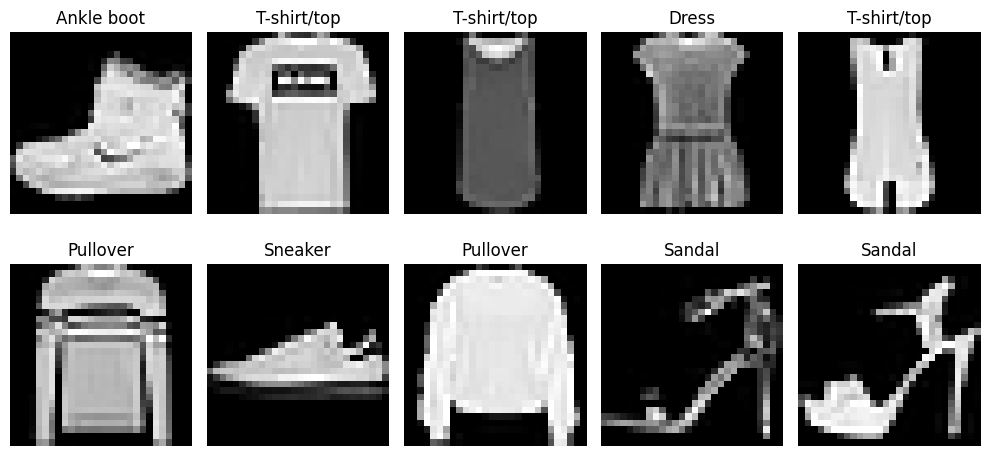

In [15]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Dictionnaire des noms des classes
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Afficher les 10 premières images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Créer une grille 2x5
    plt.imshow(trainX[i], cmap="gray")  # Afficher l'image en niveaux de gris
    plt.title(class_names[trainy[i]])  # Ajouter le nom de la classe
    plt.axis("off")  # Masquer les axes

plt.tight_layout()
plt.show()


## Représentation des classes en nuage de points 

1. ACP

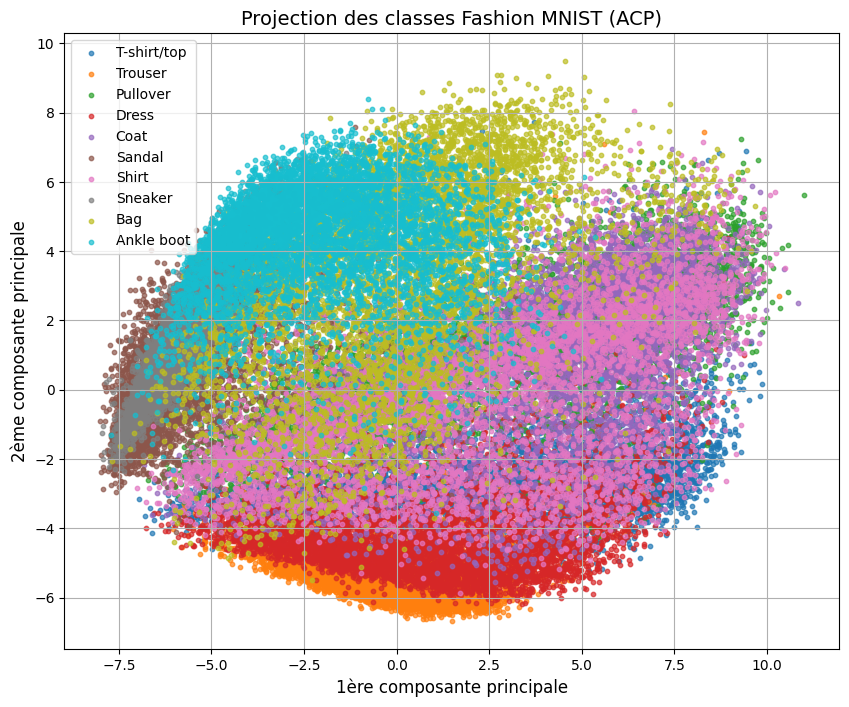

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.datasets import fashion_mnist

# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Aplatir les images en vecteurs de taille 784
trainX_flat = trainX.reshape(trainX.shape[0], -1)

# Normaliser les données (important pour l'ACP)
trainX_flat = trainX_flat / 255.0

# Appliquer l'ACP pour réduire à 2 dimensions
pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX_flat)

# Dictionnaire des noms des classes
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Création d'un scatter plot avec des couleurs pour chaque classe
plt.figure(figsize=(10, 8))
for class_id in np.unique(trainy):
    indices = trainy == class_id
    plt.scatter(trainX_pca[indices, 0], trainX_pca[indices, 1], label=class_names[class_id], s=10, alpha=0.7)

# Ajouter des légendes et des titres
plt.title("Projection des classes Fashion MNIST (ACP)", fontsize=14)
plt.xlabel("1ère composante principale", fontsize=12)
plt.ylabel("2ème composante principale", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True)
plt.show()


2. ALD

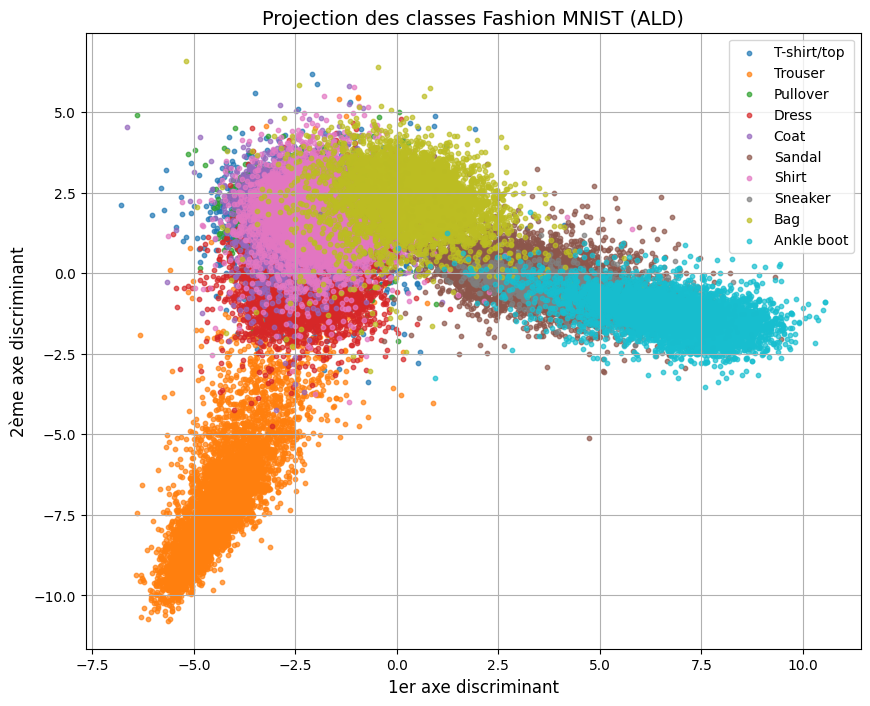

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.datasets import fashion_mnist

# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Aplatir les images en vecteurs de taille 784
trainX_flat = trainX.reshape(trainX.shape[0], -1)

# Normaliser les données
trainX_flat = trainX_flat / 255.0

# Appliquer l'ALD pour réduire à 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
trainX_lda = lda.fit_transform(trainX_flat, trainy)

# Dictionnaire des noms des classes
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Création d'un scatter plot avec des couleurs pour chaque classe
plt.figure(figsize=(10, 8))
for class_id in np.unique(trainy):
    indices = trainy == class_id
    plt.scatter(trainX_lda[indices, 0], trainX_lda[indices, 1], label=class_names[class_id], s=10, alpha=0.7)

# Ajouter des légendes et des titres
plt.title("Projection des classes Fashion MNIST (ALD)", fontsize=14)
plt.xlabel("1er axe discriminant", fontsize=12)
plt.ylabel("2ème axe discriminant", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True)
plt.show()


## Représentation en diagramme de paire (dit "pairplot")  nuage de points suivant les 3 axes:
   -  Les 3 premieres composantes de l'ACP.
   -  Les 3 premiers axes de l'ALD.


2024-11-27 08:23:45.519687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 08:23:45.549591: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 08:23:45.630836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732692225.703898  434233 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732692225.721732  434233 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


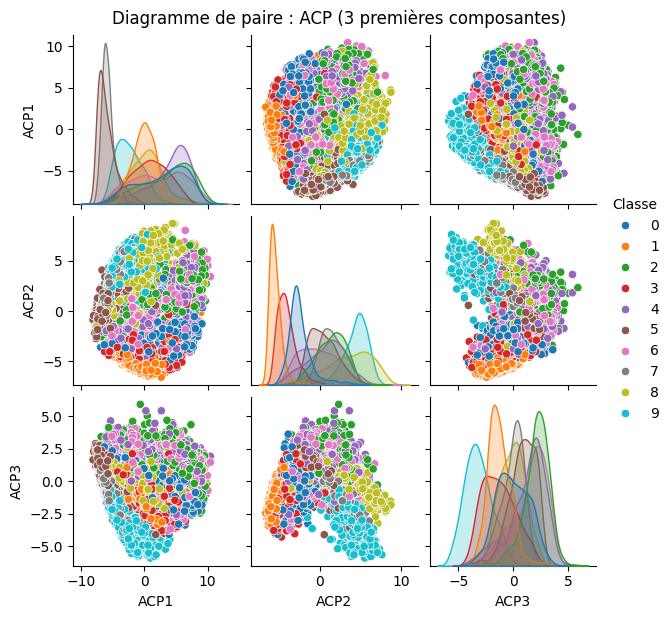

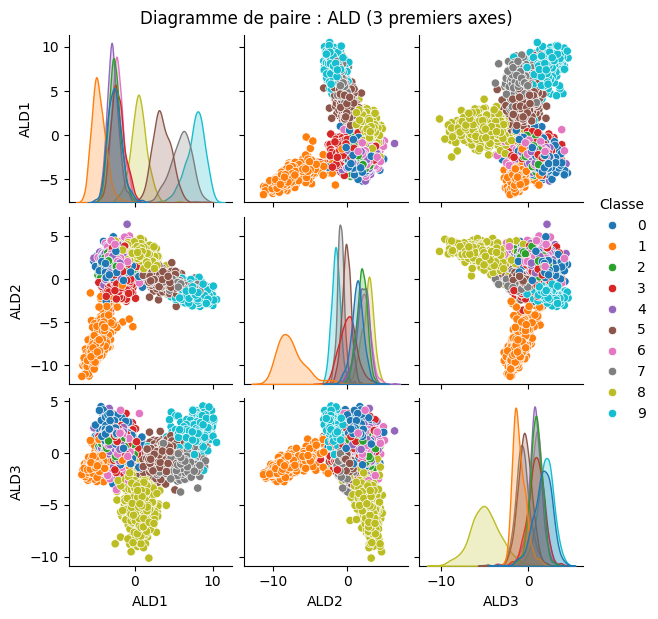

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.datasets import fashion_mnist

# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Aplatir les images en vecteurs de taille 784
trainX_flat = trainX.reshape(trainX.shape[0], -1)

# Normaliser les données
trainX_flat = trainX_flat / 255.0

# Prendre un échantillon aléatoire de 10% des données
np.random.seed(42)
indices = np.random.choice(trainX_flat.shape[0], size=int(0.1 * trainX_flat.shape[0]), replace=False)
trainX_sampled = trainX_flat[indices]
trainy_sampled = trainy[indices]

# --- ACP ---
pca = PCA(n_components=3)  # Garder 3 composantes principales
trainX_pca = pca.fit_transform(trainX_sampled)

# --- ALD ---
lda = LinearDiscriminantAnalysis(n_components=3)  # Garder 3 axes discriminants
trainX_lda = lda.fit_transform(trainX_sampled, trainy_sampled)

# Dictionnaire des noms des classes
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# --- Préparer les données pour le pairplot ---
# ACP
df_pca = pd.DataFrame(trainX_pca[:, :3], columns=["ACP1", "ACP2", "ACP3"])
df_pca["Classe"] = trainy_sampled

# ALD
df_lda = pd.DataFrame(trainX_lda[:, :3], columns=["ALD1", "ALD2", "ALD3"])
df_lda["Classe"] = trainy_sampled

# --- Diagramme de paire (pairplot) pour l'ACP ---
sns.pairplot(df_pca, hue="Classe", palette="tab10", diag_kind="kde", height=2)
plt.suptitle("Diagramme de paire : ACP (3 premières composantes)", y=1.02)
plt.show()

# --- Diagramme de paire (pairplot) pour l'ALD ---
sns.pairplot(df_lda, hue="Classe", palette="tab10", diag_kind="kde", height=2)
plt.suptitle("Diagramme de paire : ALD (3 premiers axes)", y=1.02)
plt.show()


## Partie 2 - Classification par Réseau Dense

In [28]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Aplatir les images en vecteurs de taille 784
trainX_flat = trainX.reshape(trainX.shape[0], -1)
testX_flat = testX.reshape(testX.shape[0], -1)

# Normaliser les données (valeurs entre 0 et 1)
trainX_flat = trainX_flat / 255.0
testX_flat = testX_flat / 255.0

# Convertir les labels en one-hot encoding
trainy_one_hot = to_categorical(trainy, 10)
testy_one_hot = to_categorical(testy, 10)

# Créer le modèle
model = Sequential()

# Couche d'entrée (784 neurones) -> 1ère couche cachée (128 neurones avec activation ReLU)
model.add(Dense(128, input_dim=784, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))  # Dropout pour éviter le sur-apprentissage

# 2ème couche cachée (64 neurones avec activation ReLU)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

# Couche de sortie (10 neurones, softmax pour classification multi-classes)
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback pour l'arrêt précoce (early stopping)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(trainX_flat, trainy_one_hot, epochs=50, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(testX_flat, testy_one_hot, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-15 16:49:15.747199: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
1500/1500 - 20s - 13ms/step - accuracy: 0.7767 - loss: 0.8194 - val_accuracy: 0.8385 - val_loss: 0.5954
Epoch 2/50
1500/1500 - 16s - 11ms/step - accuracy: 0.8305 - loss: 0.6141 - val_accuracy: 0.8407 - val_loss: 0.5557
Epoch 3/50
1500/1500 - 15s - 10ms/step - accuracy: 0.8369 - loss: 0.5743 - val_accuracy: 0.8460 - val_loss: 0.5317
Epoch 4/50
1500/1500 - 14s - 9ms/step - accuracy: 0.8389 - loss: 0.5497 - val_accuracy: 0.8572 - val_loss: 0.5008
Epoch 5/50
1500/1500 - 18s - 12ms/step - accuracy: 0.8429 - loss: 0.5419 - val_accuracy: 0.8532 - val_loss: 0.4998
Epoch 6/50
1500/1500 - 14s - 9ms/step - accuracy: 0.8425 - loss: 0.5336 - val_accuracy: 0.8558 - val_loss: 0.4956
Epoch 7/50
1500/1500 - 13s - 9ms/step - accuracy: 0.8462 - loss: 0.5288 - val_accuracy: 0.8588 - val_loss: 0.4915
Epoch 8/50
1500/1500 - 10s - 7ms/step - accuracy: 0.8450 - loss: 0.5289 - val_accuracy: 0.8577 - val_loss: 0.4894
Epoch 9/50
1500/1500 - 13s - 9ms/step - accuracy: 0.8472 - loss: 0.5203 - val_accura

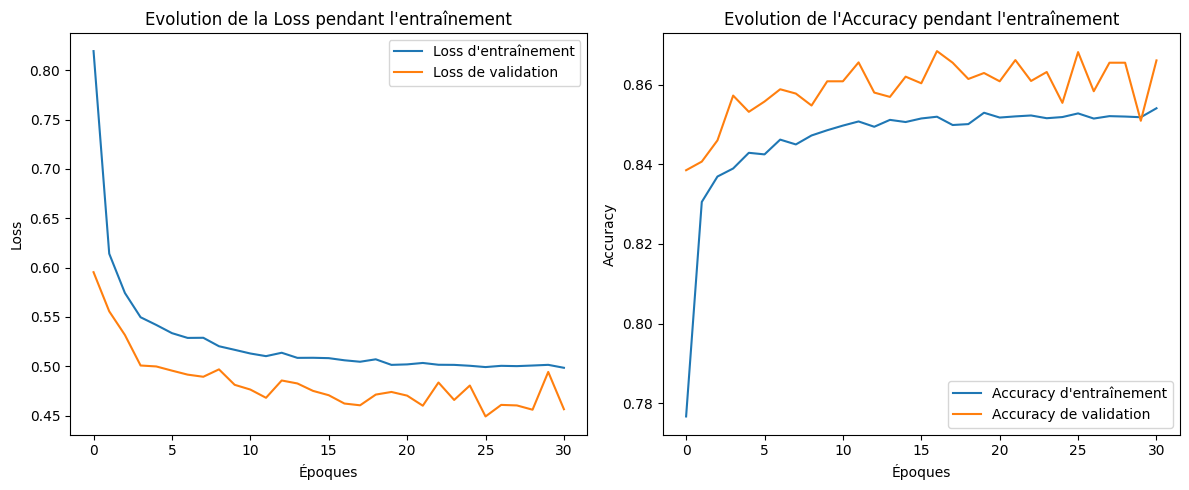

In [29]:
import matplotlib.pyplot as plt

# Tracer l'évolution de la fonction Loss
plt.figure(figsize=(12, 5))

# Courbe de la perte d'entraînement
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss d\'entraînement')
plt.plot(history.history['val_loss'], label='Loss de validation')
plt.title('Evolution de la Loss pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy de validation')
plt.title('Evolution de l\'Accuracy pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

# Afficher les courbes
plt.tight_layout()
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


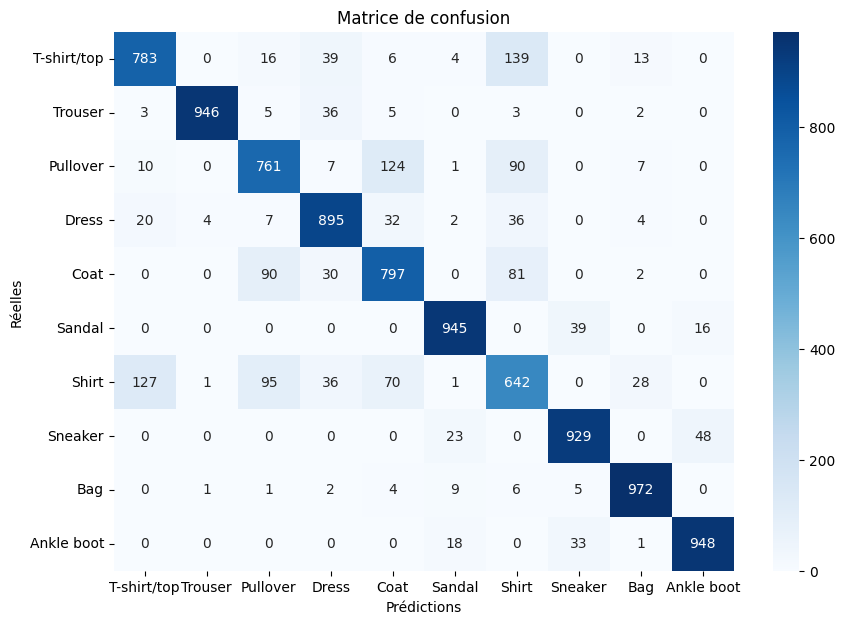

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Prédictions sur les données de test
predictions = model.predict(testX_flat)
predicted_classes = np.argmax(predictions, axis=1)  # Prendre l'indice de la classe avec la probabilité la plus élevée

# Calcul de la matrice de confusion
cm = confusion_matrix(testy, predicted_classes)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## représentation des 10 premières mauvaises prédiction avec leur classe exacte

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


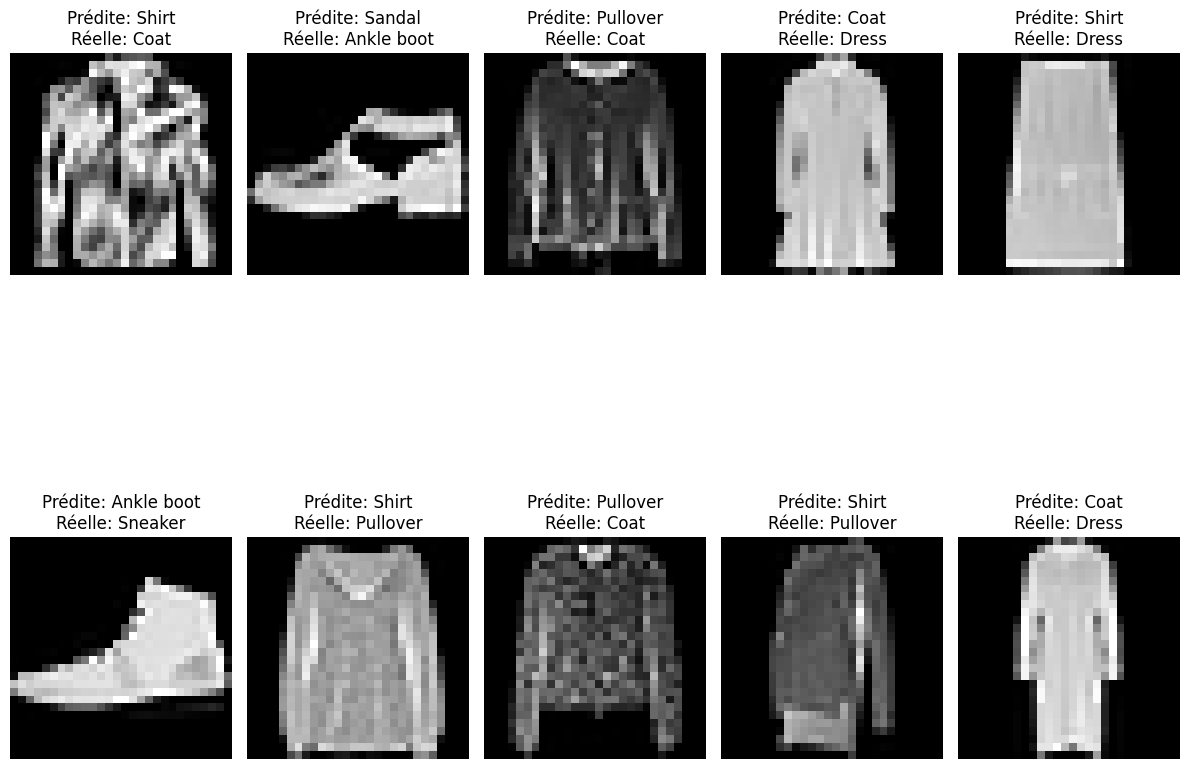

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Prédictions sur les données de test
predictions = model.predict(testX_flat)
predicted_classes = np.argmax(predictions, axis=1)  # Classes prédites

# Identifier les indices des mauvaises prédictions
incorrect_indices = np.where(predicted_classes != testy)[0]

# Limiter à 10 erreurs pour l'affichage, si plus de 10 erreurs
num_errors_to_show = min(10, len(incorrect_indices))

# Tracer les images des mauvaises prédictions
plt.figure(figsize=(12, 12))
for i in range(num_errors_to_show):
    idx = incorrect_indices[i]
    plt.subplot(2, 5, i + 1)  # Disposer sur une grille 2x5
    plt.imshow(testX[idx], cmap='gray')
    plt.title(f"Prédite: {class_names[predicted_classes[idx]]}\nRéelle: {class_names[testy[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Partie 3- Classification par réseau neuronal convolutif (CNN)¶

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

# Prétraitement des données
trainX_reshaped = trainX.reshape(-1, 28, 28, 1) / 255.0  # Ajouter la dimension pour les canaux
testX_reshaped = testX.reshape(-1, 28, 28, 1) / 255.0
trainy_one_hot = to_categorical(trainy, 10)
testy_one_hot = to_categorical(testy, 10)

# Définition du modèle CNN
model = Sequential()

# Convolution + Pooling 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution + Pooling 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatissement
model.add(Flatten())

# Couche entièrement connectée 1
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

# Couche entièrement connectée 2
model.add(Dense(64, activation='relu'))

# Couche de sortie
model.add(Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback pour l'arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(trainX_reshaped, trainy_one_hot, epochs=30, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Évaluation sur les données de test
test_loss, test_accuracy = model.evaluate(testX_reshaped, testy_one_hot, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 91.07%


## traçage de l'evolution de loss et accuracy

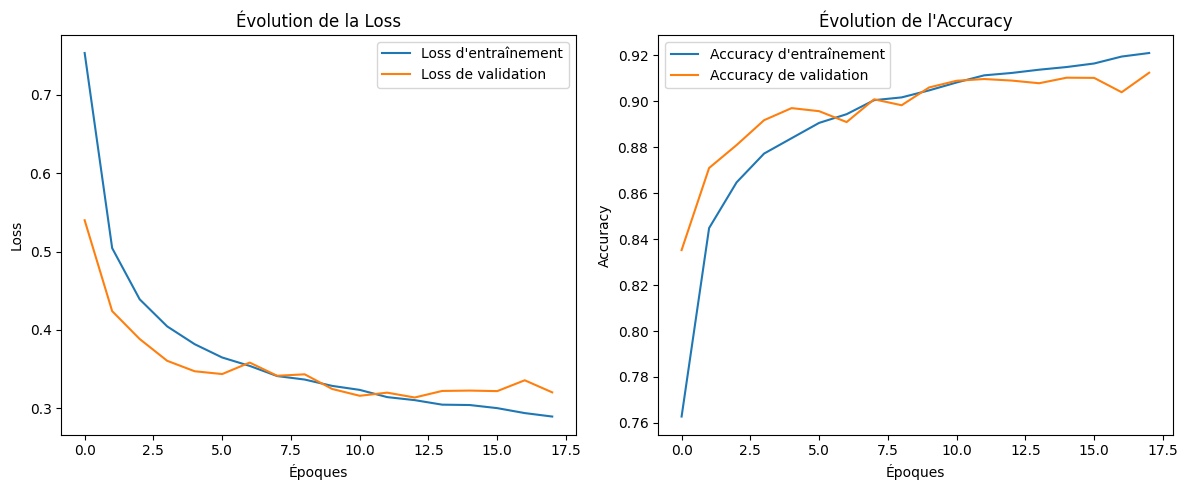

In [6]:
plt.figure(figsize=(12, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss d\'entraînement')
plt.plot(history.history['val_loss'], label='Loss de validation')
plt.title('Évolution de la Loss')
plt.xlabel('Époques')
plt.ylabel('Loss')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy de validation')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Représentation de la matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


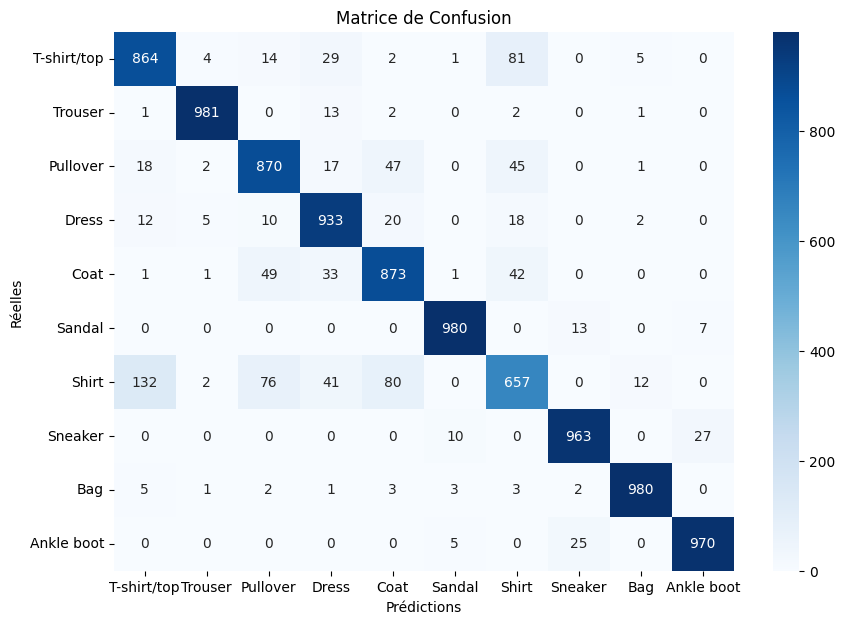

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prédictions sur les données de test
predictions = model.predict(testX_reshaped)
predicted_classes = np.argmax(predictions, axis=1)  # Classes prédites

# Calcul de la matrice de confusion
cm = confusion_matrix(testy, predicted_classes)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## Représentation des mauvaises prédictions

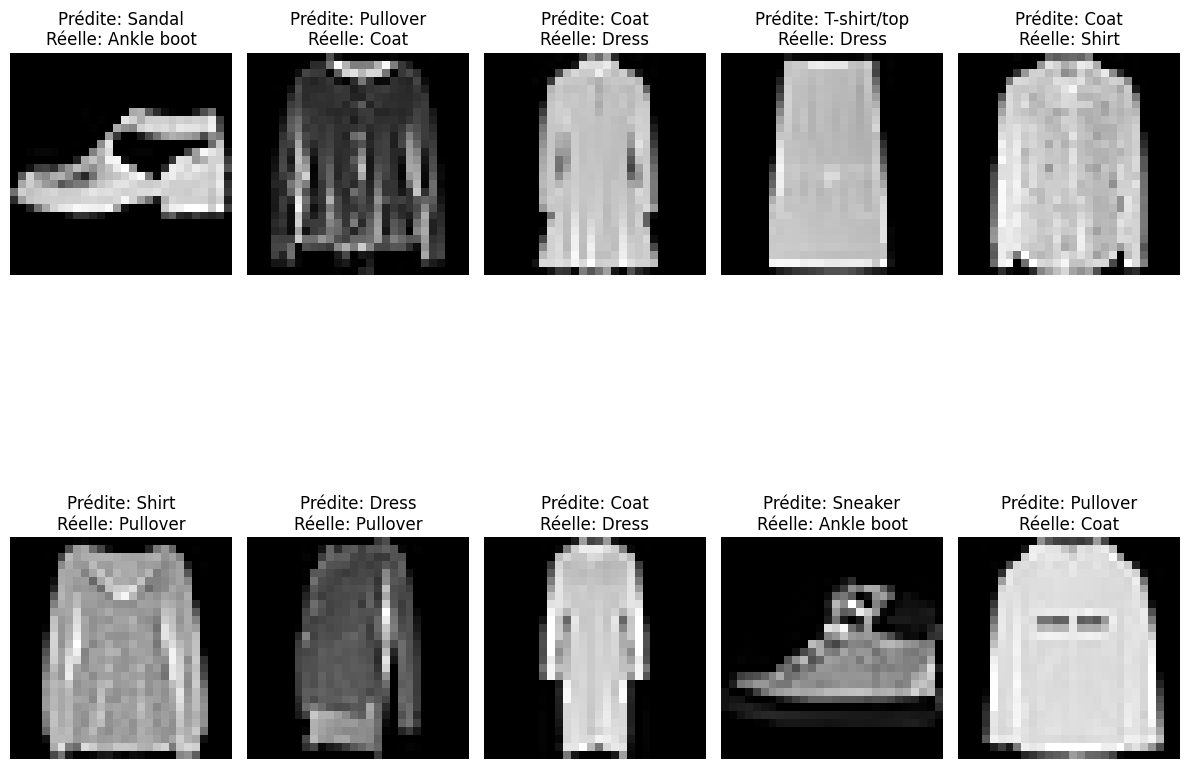

In [8]:
# Identifier les indices des mauvaises prédictions
incorrect_indices = np.where(predicted_classes != testy)[0]

# Limiter le nombre d'images à afficher (par exemple 10 erreurs maximum)
num_errors_to_show = min(10, len(incorrect_indices))

# Afficher les images des mauvaises prédictions
plt.figure(figsize=(12, 12))
for i in range(num_errors_to_show):
    idx = incorrect_indices[i]
    plt.subplot(2, 5, i + 1)  # Disposer les images sur une grille 2x5
    plt.imshow(testX[idx], cmap='gray')
    plt.title(f"Prédite: {class_names[predicted_classes[idx]]}\nRéelle: {class_names[testy[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Partie 4

Le modèle CNN inspiré de LeNet-5 offre de solides performances avec une précision d’environ 90 % sur l’ensemble de test, mais des confusions subsistent entre classes visuellement proches, comme chemises et pullovers, ou sneakers et sandales.

Ces erreurs sont dues à des similitudes visuelles, une architecture relativement simple, et un manque de diversité dans les données d’entraînement.

Des améliorations sont possibles via l’augmentation de données (rotations, zooms, etc.), l’ajustement d’hyperparamètres, et l’utilisation de modèles plus complexes comme ResNet. Une analyse ciblée des confusions, combinée à une régularisation accrue, pourrait renforcer la capacité du modèle à différencier des classes similaires, tout en maintenant une bonne généralisation.